#Home Work 3 


References:

1. https://stackoverflow.com/questions/68673846/attributeerror-module-tensorflow-has-no-attribute-div

2. https://www.cs.toronto.edu/~kriz/cifar.html ( instruction and code at py version section )

3. https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

4. https://knowyourdata-tfds.withgoogle.com/tab=STATS&dataset=cifar10

5. https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/

6. https://www.tensorflow.org/api_docs/python/tf/convert_to_tensor

7. https://www.tensorflow.org/api_docs/python/tf/concat






##GPU Check

In [ ]:
#Path: TensorFlow/Tejas/
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.2


In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.641480469999806
GPU (s):
0.04651965899938659
GPU speedup over CPU: 56x


##Dependencies

In [ ]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
import keras.utils
from keras import utils as np_utils
from keras.models import Sequential
from keras.layers import  Dense, Dropout, Activation, Flatten
from librosa.core import stft,istft
import soundfile as sf
from sklearn.model_selection import train_test_split
import tensorflow as tf
%matplotlib inline

##Load Data Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reference : https://www.cs.toronto.edu/~kriz/cifar.html ( instruction and code at py version section )

def unpickle(my_file):
    import pickle
    with open(my_file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

dictionary = {}
merge_data = []




In [ ]:
# We stick with inbuilt dataset to avoid complexity 
# Ref : https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
#Data viz : https://knowyourdata-tfds.withgoogle.com/#tab=STATS&dataset=cifar10
cifar10_data = tf.keras.datasets.cifar10
(x_train, Y_train), (x_test, Y_test) = cifar10_data.load_data()

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x_train, Y_train, test_size=0.1, random_state=3)

In [ ]:

print("Shape of X_train is : ",X_train.shape)
print("Shape of y_train is : ",y_train.shape)
print("Shape of X_val is : ",X_val.shape)
print("Shape of y_val is : ",y_val.shape)

Shape of X_train is :  (45000, 32, 32, 3)
Shape of y_train is :  (45000, 1)
Shape of X_val is :  (5000, 32, 32, 3)
Shape of y_val is :  (5000, 1)


Shape is (Input, Width, Height, Depth )

##Normalize data

###Black and White ( /255)

In [ ]:
X_train_norm,X_val_norm, X_test_norm = X_train/255, X_val/255, x_test/255

In [ ]:
print('Min: %.3f, Max: %.3f' % (X_train_norm.min(), X_train_norm.max()))

Min: 0.000, Max: 1.000


In [ ]:
print('Min: %.3f, Max: %.3f' % (X_val_norm.min(), X_val_norm.max()))

Min: 0.000, Max: 1.000


In [ ]:
print('Min: %.3f, Max: %.3f' % (X_test_norm.min(), X_test_norm.max()))

Min: 0.000, Max: 1.000


###Re-Scale Image to Range [-1,1] (Around 0)
Have done Global Re Centering

Refence: https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/

In [ ]:
X_train_cen = (X_train_norm - X_train_norm.mean())
X_val_cen = (X_val_norm - X_val_norm.mean())
X_test_cen = (X_test_norm -X_test_norm.mean())

In [ ]:
print('Min: %.3f, Max: %.3f' % (X_train_cen.min(), X_train_cen.max()))

Min: -0.473, Max: 0.527


In [ ]:
print('Min: %.3f, Max: %.3f' % (X_val_cen.min(), X_val_cen.max()))

Min: -0.474, Max: 0.526


In [ ]:
print('Min: %.3f, Max: %.3f' % (X_test_cen.min(), X_test_cen.max()))

Min: -0.477, Max: 0.523


###To Tensor

In [ ]:
#Ref:https://www.tensorflow.org/api_docs/python/tf/convert_to_tensor
X_train_tensor = tf.convert_to_tensor(X_train_cen)
X_val_tensor = tf.convert_to_tensor(X_val_cen)
X_test = tf.convert_to_tensor(X_test_cen)

In [ ]:
type(X_train_tensor)


tensorflow.python.framework.ops.EagerTensor

In [ ]:
type(X_test)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
print('Train: ',X_train_tensor.shape)
print('Val: ',X_val_tensor.shape)
print('Test: ',X_test.shape)

Train:  (45000, 32, 32, 3)
Val:  (5000, 32, 32, 3)
Test:  (10000, 32, 32, 3)


##Model:

1st 2d conv layer:  there are 10 kernels whose size is 5x5x3; stride=1
Maxpooling:  2x2 with stride=2

1st 2d conv layer:  there are 10 kernels whose size is 5x5x10; stride=1
Maxpooling:  2x2 with stride=2

1st fully-connected layer: [flattened final feature map] x 20 

2st fully-connected layer: 20 x 10 Softmax on the 10 classes


Reshape input to 35x35,3

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(filters = 10,kernel_size = (5,5),strides = 1, activation = 'relu',data_format='channels_last',input_shape=(32,32,3)),
    keras.layers.MaxPool2D(pool_size = (2,2),strides = 2),
    keras.layers.Conv2D(filters = 10,kernel_size = (5,5),strides = 1, activation = 'relu',data_format='channels_last' ),
    keras.layers.MaxPool2D(pool_size = (2,2),strides = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 20, activation = 'relu', kernel_initializer='he_normal'),
    keras.layers.Dense(units = 10, activation = 'softmax', kernel_initializer = 'he_normal')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_tensor, y_train, validation_data=(X_val_tensor, y_val), batch_size=128, epochs=200)

Epoch 1/200
352/352 [==============================] - 2s 5ms/step - loss: 1.7756 - accuracy: 0.3468 - val_loss: 1.5515 - val_accuracy: 0.4266
Epoch 2/200
352/352 [==============================] - 2s 4ms/step - loss: 1.4578 - accuracy: 0.4718 - val_loss: 1.4219 - val_accuracy: 0.4770
Epoch 3/200
352/352 [==============================] - 2s 4ms/step - loss: 1.3588 - accuracy: 0.5096 - val_loss: 1.3497 - val_accuracy: 0.5110
Epoch 4/200
352/352 [==============================] - 2s 4ms/step - loss: 1.2992 - accuracy: 0.5342 - val_loss: 1.3007 - val_accuracy: 0.5320
Epoch 5/200
352/352 [==============================] - 2s 4ms/step - loss: 1.2537 - accuracy: 0.5510 - val_loss: 1.2719 - val_accuracy: 0.5428
Epoch 6/200
352/352 [==============================] - 2s 4ms/step - loss: 1.2179 - accuracy: 0.5657 - val_loss: 1.2541 - val_accuracy: 0.5564
Epoch 7/200
352/352 [==============================] - 2s 4ms/step - loss: 1.1891 - accuracy: 0.5772 - val_loss: 1.2114 - val_accuracy: 0.5748

####Graph for Model 1

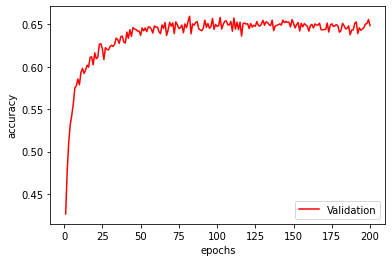

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,201),history.history['val_accuracy'],color='red')
plt.legend(['Validation'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

####Graph Train vs Test Model 1

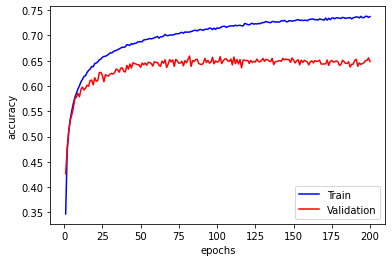

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,201),history.history['accuracy'],color='blue')
plt.plot(range(1,201),history.history['val_accuracy'],color='red')
plt.legend(['Train','Validation'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

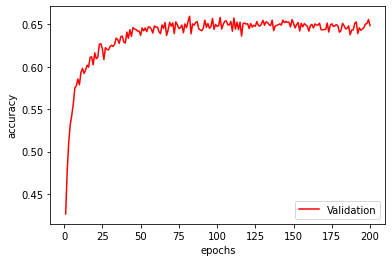

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,201),history.history['val_accuracy'],color='red')
plt.legend(['Validation'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

##Augmentation

Make sure Data is in range of [0,1]

###Dataset 1

Brighten every pixel in every image by 10%, e.g., by multiplying 1.1. Make sure though, that they don’t exceed 1. For example, you may want to do something like this: np.minimum(1.1*X, 1).

In [ ]:
aug_ds1 = np.minimum(1.1*X_train_norm, 1)

In [ ]:
print('Min: %.3f, Max: %.3f' % (aug_ds1.min(), aug_ds1.max()))

Min: 0.000, Max: 1.000


In [ ]:
aug_ds1 = tf.convert_to_tensor(aug_ds1)

###Dataset 2

Darken every pixel in every image by 10%, e.g., by multiplying 0.9

In [ ]:
aug_ds2 = X_train_norm * 0.9

In [ ]:
aug_ds2 = tf.convert_to_tensor(aug_ds2)

###Dataset 3 

Flip all images horizontally (not upside down, but in the left-right direction). As if they are mirrored.

In [ ]:
aug_ds3  = tf.convert_to_tensor(X_train_norm)

In [ ]:
aug_ds3 = tf.image.flip_left_right(aug_ds3)

###Dataset 4
The original training set.

In [ ]:
aug_ds4 = X_train_norm

In [ ]:
aug_ds4 = tf.convert_to_tensor(aug_ds4)

### Rescaling all Datasets to [-1,1]

Refernce : https://stackoverflow.com/questions/38376478/changing-the-scale-of-a-tensor-in-tensorflow

In [ ]:
def rescale(data):
  data = tf.math.divide(
   tf.subtract(
      data, 
      tf.reduce_min(data)
   ), 
   tf.subtract(
      tf.reduce_max(data), 
      tf.reduce_min(data)
   )
  )
  return 2*data-1


I was encountering this error if i rescaled without casting to float32 : failed to allocate memory [Op:RealDiv]

In [ ]:
aug_ds1 = tf.cast(aug_ds1,tf.float32)
aug_ds2 = tf.cast(aug_ds2,tf.float32)
aug_ds3 = tf.cast(aug_ds3,tf.float32)
aug_ds4 = tf.cast(aug_ds4,tf.float32)

In [ ]:
aug_ds1_cen = rescale(aug_ds1)
aug_ds2_cen = rescale(aug_ds2)
aug_ds3_cen = rescale(aug_ds3)
aug_ds4_cen = rescale(aug_ds4)

In [ ]:
X_val_tensor = rescale(X_val_cen)

####Concat Data
Ref: https://www.tensorflow.org/api_docs/python/tf/concat

In [ ]:
X_aug_train = tf.concat([aug_ds1_cen, aug_ds2_cen,aug_ds3_cen,aug_ds4_cen], 0)

In [ ]:
X_aug_train.shape

TensorShape([180000, 32, 32, 3])

In [ ]:
y_aug_train = tf.concat([y_train, y_train,y_train,y_train], 0)

In [ ]:
y_aug_train.shape

TensorShape([180000, 1])

###Visualize Data

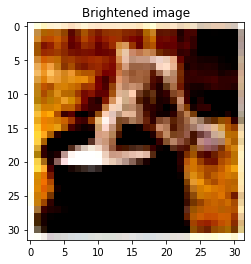

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_aug_train[100])
plt.title('Brightened image')
plt.show()

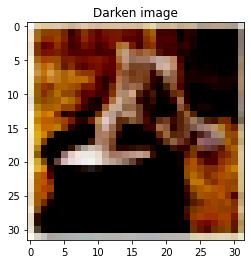

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_aug_train[45000+100])
plt.title('Darken image')
plt.show()

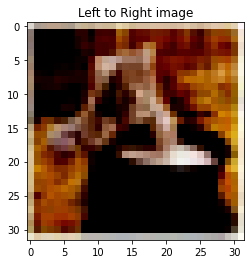

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_aug_train[(2*45000)+100])
plt.title('Left to Right image')
plt.show()

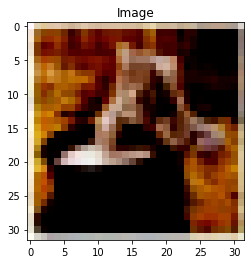

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_aug_train[(3*45000)+100])
plt.title('Image')
plt.show()

###Retrain Model on Augmented Data

In [ ]:
model2 = keras.Sequential([
    keras.layers.Conv2D(filters = 10,kernel_size = (5,5),strides = 1, activation = 'relu',data_format='channels_last',input_shape=(32,32,3)),
    keras.layers.MaxPool2D(pool_size = (2,2),strides = 2),
    keras.layers.Conv2D(filters = 10,kernel_size = (5,5),strides = 1, activation = 'relu',data_format='channels_last' ),
    keras.layers.MaxPool2D(pool_size = (2,2),strides = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 20, activation = 'relu', kernel_initializer='he_normal'),
    keras.layers.Dense(units = 10, activation = 'softmax', kernel_initializer = 'he_normal')
])

In [ ]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_aug_train, y_aug_train, validation_data=(X_val_tensor, y_val), batch_size=512, epochs=200)

Epoch 1/200
352/352 [==============================] - 3s 9ms/step - loss: 1.6902 - accuracy: 0.3853 - val_loss: 1.4771 - val_accuracy: 0.4652
Epoch 2/200
352/352 [==============================] - 3s 8ms/step - loss: 1.4086 - accuracy: 0.4922 - val_loss: 1.3767 - val_accuracy: 0.5018
Epoch 3/200
352/352 [==============================] - 3s 8ms/step - loss: 1.3085 - accuracy: 0.5322 - val_loss: 1.2978 - val_accuracy: 0.5308
Epoch 4/200
352/352 [==============================] - 3s 8ms/step - loss: 1.2407 - accuracy: 0.5598 - val_loss: 1.2420 - val_accuracy: 0.5498
Epoch 5/200
352/352 [==============================] - 3s 8ms/step - loss: 1.1868 - accuracy: 0.5799 - val_loss: 1.1878 - val_accuracy: 0.5772
Epoch 6/200
352/352 [==============================] - 3s 8ms/step - loss: 1.1469 - accuracy: 0.5960 - val_loss: 1.1622 - val_accuracy: 0.5972
Epoch 7/200
352/352 [==============================] - 3s 8ms/step - loss: 1.1158 - accuracy: 0.6089 - val_loss: 1.1321 - val_accuracy: 0.6002

####Graph for Model 2

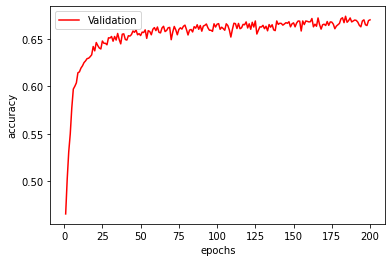

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,201),history2.history['val_accuracy'],color='red')
plt.legend(['Validation'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

####Graph Train vs Test Model 2

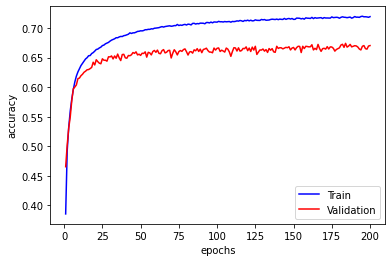

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,201),history2.history['accuracy'],color='blue')
plt.plot(range(1,201),history2.history['val_accuracy'],color='red')
plt.legend(['Train','Validation'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

####Graph for Model1 vs Model 2

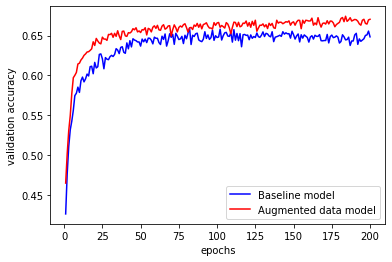

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,201),history.history['val_accuracy'],color='blue')
plt.plot(range(1,201),history2.history['val_accuracy'],color='red')
plt.legend(['Baseline model','Augmented data model'])
plt.xlabel('epochs')
plt.ylabel('validation accuracy')
plt.show()